In [1]:
 # -*- coding: utf-8 -*-
import pandas as pd

In [2]:
data = pd.read_excel("朝阳医院2018年销售数据.xlsx",dtype="object")

In [3]:
df = pd.DataFrame(data)
print(df.shape)

(6578, 7)


In [4]:
print(df.index)

RangeIndex(start=0, stop=6578, step=1)


In [5]:
print(df.columns)

Index(['购药时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')


In [6]:
print(df.count())

购药时间    6576
社保卡号    6576
商品编码    6577
商品名称    6577
销售数量    6577
应收金额    6577
实收金额    6577
dtype: int64


In [7]:
df.rename(columns={"购药时间":"销售时间"},inplace=True)
print(df.columns)

Index(['销售时间', '社保卡号', '商品编码', '商品名称', '销售数量', '应收金额', '实收金额'], dtype='object')


In [8]:
df = df.dropna()
print(df.shape)

(6575, 7)


In [9]:
df["销售数量"] = df["销售数量"].astype("f8")
df["应收金额"] = df["应收金额"].astype("f8")
df["实收金额"] = df["实收金额"].astype("f8")
print(df.dtypes)

销售时间     object
社保卡号     object
商品编码     object
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object


In [10]:
def splitsaletime(timeColser):
    timelist = []
    for t in timeColser:
        timelist.append(t.split(" ")[0])
    timeser = pd.Series(timelist)
    return timeser

In [11]:
t = df.loc[:,"销售时间"]
timeser = splitsaletime(t)
df.loc[:,"销售时间"] = timeser
print(df.head())

         销售时间           社保卡号    商品编码     商品名称  销售数量   应收金额    实收金额
0  2018-01-01      001616528  236701  强力VC银翘片   6.0   82.8   69.00
1  2018-01-02      001616528  236701  清热解毒口服液   1.0   28.0   24.64
2  2018-01-06     0012602828  236701       感康   2.0   16.8   15.00
3  2018-01-11  0010070343428  236701    三九感冒灵   1.0   28.0   28.00
4  2018-01-15    00101554328  236701    三九感冒灵   8.0  224.0  208.00


In [12]:
df.loc[:, "销售时间"] = pd.to_datetime(df.loc[:, "销售时间"], errors='coerce')

In [13]:
print(df.dtypes)

销售时间     object
社保卡号     object
商品编码     object
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object


In [14]:
df = df.dropna()
print(df.shape)

(6549, 7)


In [15]:
df = df.sort_values(by='销售时间',ascending=True)
print(df.head)

# 重命名行名（index）
df = df.reset_index(drop=True)
df.describe()

<bound method NDFrame.head of                      销售时间           社保卡号     商品编码          商品名称  销售数量   应收金额  \
0     2018-01-01 00:00:00      001616528   236701       强力VC银翘片   6.0   82.8   
3436  2018-01-01 00:00:00     0010616728   865099    硝苯地平片(心痛定)   2.0    3.4   
1190  2018-01-01 00:00:00  0010073966328   861409  非洛地平缓释片(波依定)   5.0  162.5   
3859  2018-01-01 00:00:00  0010073966328   866634   硝苯地平控释片(欣然)   6.0  111.0   
3888  2018-01-01 00:00:00  0010014289328   866851   缬沙坦分散片(易达乐)   1.0   26.0   
...                   ...            ...      ...           ...   ...    ...   
2122  2018-07-19 00:00:00  0010081634128   861459    吲达帕胺片(寿比山)   2.0   33.0   
5882  2018-07-19 00:00:00      001616528   861485  富马酸比索洛尔片(博苏)   1.0   16.8   
4462  2018-07-19 00:00:00  0010014256528   871158     厄贝沙坦片(吉加)   2.0   34.0   
864   2018-07-19 00:00:00    00101409528  2367011           开博通   2.0   62.0   
5990  2018-07-19 00:00:00    00104002228   861435     缬沙坦胶囊(代文)   5.0  179.0   

       实收

,销售数量,应收金额,实收金额
count,6549.000000,6549.000000,6549.000000
mean,2.384486,50.449076,46.284370
std,2.375227,87.696401,81.058426
min,-10.000000,-374.000000,-374.000000
25%,1.000000,14.000000,12.320000
50%,2.000000,28.000000,26.500000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


In [16]:
pop = df.loc[:, "销售数量"] > 0
df = df.loc[pop, :]
df.describe()

,销售数量,应收金额,实收金额
count,6506.000000,6506.000000,6506.000000
mean,2.405626,50.927897,46.727653
std,2.364565,87.650282,80.997726
min,1.000000,1.200000,0.030000
25%,1.000000,14.000000,12.600000
50%,2.000000,28.000000,27.000000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


In [17]:
# 删除重复数据（根据 销售时间 和 社保卡号 两列的组合来判断哪些行是重复的）
kpi1_df = df.drop_duplicates(subset=['销售时间', '社保卡号'])
totall = kpi1_df.shape[0]
print('总消费次数：', totall)
kpi1_df = kpi1_df.sort_values(by='销售时间', ascending=True)
kpi1_df = kpi1_df.reset_index(drop=True)
df

总消费次数： 5342


,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 00:00:00,001616528,236701,强力VC银翘片,6.0,82.8,69.0
1,2018-01-01 00:00:00,0010616728,865099,硝苯地平片(心痛定),2.0,3.4,3.0
2,2018-01-01 00:00:00,0010073966328,861409,非洛地平缓释片(波依定),5.0,162.5,145.0
3,2018-01-01 00:00:00,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5
4,2018-01-01 00:00:00,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0
...,...,...,...,...,...,...,...
6544,2018-07-19 00:00:00,0010081634128,861459,吲达帕胺片(寿比山),2.0,33.0,29.6
6545,2018-07-19 00:00:00,001616528,861485,富马酸比索洛尔片(博苏),1.0,16.8,16.8
6546,2018-07-19 00:00:00,0010014256528,871158,厄贝沙坦片(吉加),2.0,34.0,30.0
6547,2018-07-19 00:00:00,00101409528,2367011,开博通,2.0,62.0,56.0


In [18]:
startTime = kpi1_df.loc[0, '销售时间']
endTime = kpi1_df.loc[totall - 1, '销售时间']

In [19]:
daysI = (endTime - startTime).days
monthsI = daysI // 30
print('月份数：', monthsI)
kpi1_I = totall // monthsI
print('业务指标1：月均消费次数=', kpi1_I)
totalMoneyF = df.loc[:, '实收金额'].sum()

月份数： 6
业务指标1：月均消费次数= 890


In [20]:
monthMoneyF = totalMoneyF / monthsI
print('业务指标2：月均消费金额=', monthMoneyF)
pct = totalMoneyF / totall
print('业务指标3：客单价=', pct)

业务指标2：月均消费金额= 50668.35166666666
业务指标3：客单价= 56.909417821040805


In [21]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [22]:
#备份
groupdf = df

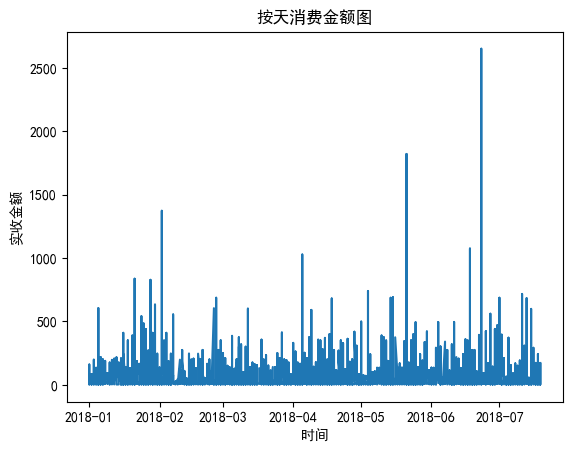

In [23]:
groupdf.index = groupdf['销售时间']
groupdf.head()
plt.plot(groupdf['实收金额'])
plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.savefig('./day.png')
plt.show()

In [25]:
gb = groupdf.groupby(groupdf.index.month)
monthdf = gb.sum(numeric_only=True)

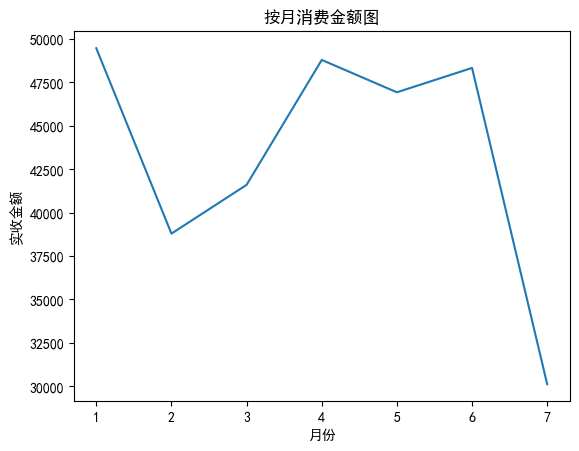

In [26]:
plt.plot(monthdf['实收金额'])
plt.title('按月消费金额图')
plt.xlabel('月份')
plt.ylabel('实收金额')
plt.savefig('./month.png')
plt.show()

In [29]:
medicine = groupdf[['商品名称', '销售数量']]
bk = medicine.groupby('商品名称')[['销售数量']]
re_medicine = bk.sum()
print(re_medicine)
re_medicine = re_medicine.sort_values(by='销售数量', ascending=False)
print(re_medicine.head())
top_medicine = re_medicine.iloc[:10, :]

                  销售数量
商品名称                  
**盐酸阿罗洛尔片(阿尔马尔)  101.0
**阿替洛尔片           17.0
D厄贝沙坦氢氯噻嗪片(倍悦)     2.0
D替格瑞洛片            10.0
D盐酸贝尼地平片          33.0
...                ...
非洛地平缓释片(康宝得维)     99.0
非洛地平缓释片(波依定)     375.0
马来酸依那普利片(怡那林)     28.0
马来酸左旋氨氯地平片(玄宁)    43.0
高特灵              366.0

[78 rows x 1 columns]
                  销售数量
商品名称                  
苯磺酸氨氯地平片(安内真)   1781.0
开博通             1440.0
酒石酸美托洛尔片(倍他乐克)  1140.0
硝苯地平片(心痛定)       825.0
苯磺酸氨氯地平片(络活喜)    796.0


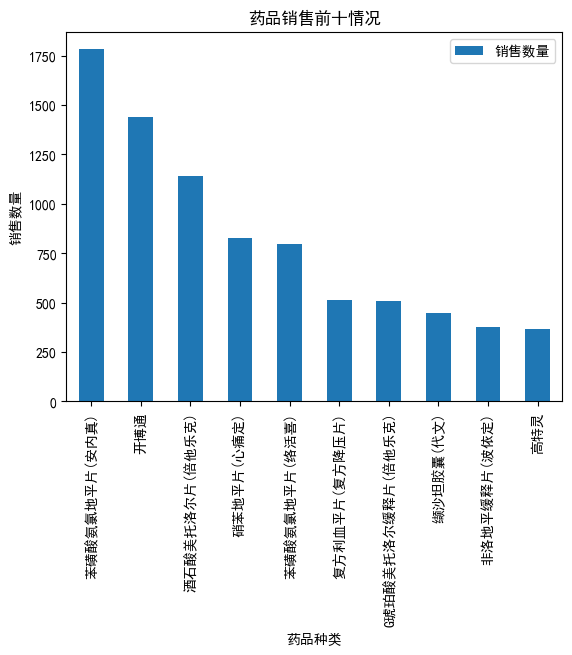

In [30]:
top_medicine.plot(kind='bar')
plt.title('药品销售前十情况')
plt.xlabel('药品种类')
plt.ylabel('销售数量')
plt.legend(loc=0)
plt.savefig('./medicine.png')
plt.show()